# Analyzing Waiting Times

1. Gaussian is a bad choice because it goes out to +/- infinity, and thus it is possible that we get a negative wait time. This cannot be the case
2. Uniform distribution just isn't true, most of the time the wait time between people will pretty close, with some outliers (thus a Gaussian, if it would work, would be better)

In [1]:
%matplotlib inline

from random import expovariate
import matplotlib.pyplot as plt
from statistics import mean

## Arrival and Serving Intervals

We are using Poisson processes to model arrival and service interals:

$$ P(x, \lambda) = \lambda e^{-\lambda x} $$

where the mean interval is:

$$ E[X] = \frac{1}{\lambda} $$

In [2]:
N = 1_000_000

arrival_rate = 10  #minutes
service_rate = 8  #minutes

arrivals = [expovariate(1 / arrival_rate) for _ in range(N)]
services = [expovariate(1 / service_rate) for _ in range(N)]

## Validate Intervals
1. Shooting star problem // Evergreen property --> if a shooting star doesn't come for the first 20 minutes, you can "cut" the graph down to start at 20 minutes.  When you do this, and scale it back up, you get the same graph.  Thus, having waited some amount of time doesn't make things more likely to happen
2. This is still PDF, so the area sums to 1

Mean arrival time: 10.00 minutes
Mean service time: 8.00 minutes


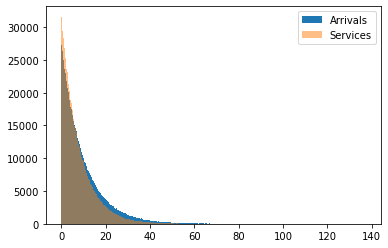

In [3]:
print(f"Mean arrival time: {mean(arrivals):.2f} minutes")
print(f"Mean service time: {mean(services):.2f} minutes")

plt.hist(arrivals, bins=500, label="Arrivals")
plt.hist(services, bins=500, alpha=0.5, label="Services")
plt.legend()
plt.show()

# M/M/1: One Cashier Model

In [4]:
waits = []
wait = 0.0
for arrival, service in zip(arrivals, services):
    wait = max(0, wait - arrival)
    waits.append(wait)
    wait += service

print(f"Mean wait time: {mean(waits):.2f} minutes")

Mean wait time: 32.55 minutes


# M/M/2: Two Cashier Model

In [7]:
waits = []
wait = [0.0, 0.0]
for arrival, service in zip(arrivals, services):
    wait = [max(0, w - arrival) for w in wait]
    cashier = wait.index(min(wait))
    waits.append(wait[cashier])
    wait[cashier] += service

print(f"Mean wait time: {mean(waits):.2f} minutes")

Mean wait time: 1.54 minutes
